# Twitter Dog Analysis
                                           - By Mu Yuhong
# Three Steps of Data Wrangling                                        
* Gathering Data
* Assessing data
* Cleaning data
* Save the data
* Visualise the data and draw insights

## Gathering Data

In [1]:
import os
import json
import csv
import time
import requests
import pandas as pd
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener

In [2]:
# Twitter enhanced data

enhanced_df = pd.read_csv("twitter-archive-enhanced.csv")

# Image data
temp_file_name = 'image-predictions.tsv'
if not os.path.isfile(temp_file_name):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    print("Downloading file from {}".format(url))
    download = requests.get(url)
    with open(temp_file_name, mode = 'wb') as temp_file:
        temp_file.write(download.content)     
images_df = pd.read_csv('image-predictions.tsv', sep = '\\t', encoding = 'utf-8')

# twitter data

consumer_key = 'KLl522fUjmDWgdfug3ytWh8cy'
consumer_secret = 'nz8hOBvavlr8NcKrv9H3zp8CGKrebLAQNMqJO68u7e0PUsluaa'
access_token = '799264271825633280-WCSaTBPifgjg969aH8TuLQHMSETRL0L'
access_secret = 'I6Z3ubxwLPFVifIWXsgG1CBbSgmcxlglNY51JT5axbPtF'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

tweets = list(enhanced_df.tweet_id)
deleted_tweets = []

temp_file_name = 'tweet_json.txt'
if not os.path.isfile(temp_file_name):
    with open(os.path.join(os.getcwd(), temp_file_name), mode = 'a+') as file:
        for tweet_id in tweets:
            try:
                tweet = api.get_status(tweet_id, tweet_mode = 'extended')
                twt_sjson = json.dumps(tweet._json)
                file.write(twt_sjson + '\n')
            except:
                deleted_tweets.append(tweet_id)
            start = time.time()
            end = time.time()
            print(end - start)
            
with open('tweet_json.txt') as file:
    df_list = []
    for line in file:
        df_list.append(json.loads(line))
        
api_ = []
for name in df_list:
    retweets = name['retweet_count']
    tweet_id = name['id']
    favs = name['favorite_count']
    api_.append({'retweet_count': retweets,
                    'tweet_id': tweet_id,
                    'favorite_count': favs})
api_df = pd.DataFrame(api_, columns = ['retweet_count', 'tweet_id', 'favorite_count'])
api_df = api_df.sort_values('tweet_id').reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


In [3]:
api_df.count()

retweet_count     2332
tweet_id          2332
favorite_count    2332
dtype: int64

## Assessing Data

In [4]:
print(enhanced_df.head())
print(enhanced_df.describe())
print(enhanced_df.info())

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  r

In [5]:
enhanced_df.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

enhanced twitter archive columns:

* tweet_id: unique identifier for each tweet
* in_reply_to_status_id: the unique id of the status the tweet was made in response to
* in_reply_to_user_id: the unique id of the user the tweet was made in response to
* timestamp: timestamp of the creation of the tweet
* source: source code of the tweet HTML
* text: text of the tweet
* retweeted_status_id: the unique id of the tweet this tweet was made in response to
* retweeted_status_user_id: the uqniue id of the user for the tweet this tweet was made in response to
* retweet_status_timestamp: the timestamp (date and time) of the tweet this tweet was made in response to
* rating_numerator: the numerator of the score of the dog being rated
* rating_denominator: the denominator of the score of the dog being rated
* name: the name of the dog
* doggo: whether the dog was described as a doggo
* floofer: whether the dog was described as a floofer
* pupper: whether the dog was described as a pupper
* puppo: whether the dog was described as a puppo

In [6]:
print(images_df.head())
print(images_df.describe())
print(images_df.info())

             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheep

image predictions columns

* tweet_id: the unique identification of the tweet which the image belongs to
* jpg_url: the URL for the image
* img_num: the number of the image
* p1: the algorithms number one prediction for the image in the tweet
* p1_conf: how confident the algorithm is in its number one prediction
* p1_dog: whether or not the number one prediction is a breed of dog
* p2: the algorithms number two prediction for the image in the tweet
* p2_conf: how confident the algorithm is in its number two prediction
* p2_dog: whether or not the number two prediction is a breed of dog
* p3: the algorithms number three prediction for the image in the tweet
* p3_conf: how confident the algorithm is in its number three prediction
* p3_dog: whether or not the number three prediction is a breed of dog

In [7]:
images_df.p1_conf.hist();

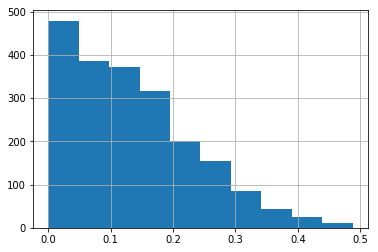

In [8]:
images_df.p2_conf.hist();

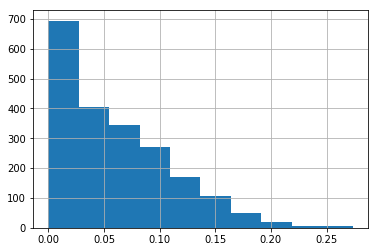

In [9]:
images_df.p3_conf.hist();

In [10]:
print(api_df.head())
print(api_df.describe())
print(api_df.info())

   retweet_count            tweet_id  favorite_count
0            479  666020888022790149            2477
1             45  666029285002620928             123
2             43  666033412701032449             119
3            135  666044226329800704             280
4             41  666049248165822465             101
       retweet_count      tweet_id  favorite_count
count    2332.000000  2.332000e+03     2332.000000
mean     2788.425815  7.419201e+17     7735.849485
std      4718.498235  6.821966e+16    12005.457211
min         1.000000  6.660209e+17        0.000000
25%       560.750000  6.782728e+17     1346.500000
50%      1304.500000  7.183508e+17     3369.500000
75%      3243.250000  7.986673e+17     9491.500000
max     80096.000000  8.924206e+17   160194.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
retweet_count     2332 non-null int64
tweet_id          2332 non-null int64
favorite_count    2332 non-null int64
dty

tweet json columns

* id: the unique identification of the tweet
* created_at: the create datetime of the tweet
* retweet_count: retweeted number
* favorite_count: tweet beling liked count number

#### Quality issues

* There are a lot of null values in columns like in_reply_to_status_id and in_reply_to_user_id.
* One suggestion is to change the timestamp to datetime stamp.
* Tweet_id should be string rather than int.
* Rating_numerator and rating_deniminator better to use double
* Need to remove the retweeted twitter
* Convert `id` column from a number to a string
* Remove not relevant columns such as `in_reply_to_status_id` and `in_reply_to_user_id`
* Remove the row with `a`, `the`, `None` for name column
* Drop columns with too many missing data
* Transform timestamp to `yyyy-MM-dd HH:mm:ss`
* Add another columns which is the rating ratio rather than two columns only
* Keeping rows with p1_dog, p2_dog, or p3_dog = True. Only keeping entries that we can predict as dog and its species.
* Consulidating image prediction into one column


#### Tidiness issues

* Concatenate datasets to make one clean dataset using merge
* Tidy the 4 stages of dog column to create variable/value 

## Cleaning data

### Make a copy first before cleaning

In [11]:
enhanced_df_clean = enhanced_df.copy()
images_df_clean = images_df.copy()
api_df_clean = api_df.copy()

### Define
* change the timestamp column from str to timestamp type
* change the tweet_id to str type
* convert timestamp to datetime
* clean the rating number
* choose the tweet which is not retweet
* drop 'in_reply_to_status_id', 'in_reply_to_user_id
* replace invalid names with None
* tidy the 4 stages of dog column to create variable/value using melt
* concatenate the dataframs into a combined one

### Code

* convert timestamp to datetime

In [12]:
enhanced_df_clean['timestamp'] = pd.to_datetime(enhanced_df_clean['timestamp'] )

* change the tweet_id type to string

In [13]:
enhanced_df_clean['tweet_id'] = enhanced_df_clean['tweet_id'].astype('str')
images_df_clean['tweet_id'] = images_df_clean['tweet_id'].astype('str')
api_df_clean['tweet_id'] = api_df_clean['tweet_id'].astype('str')

* clean the ratings

In [14]:
enhanced_df_clean[['rating_numerator', 'rating_denominator']] =enhanced_df_clean[['rating_numerator', 'rating_denominator']].astype('double')

In [15]:
enhanced_df_clean.rating_denominator.value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

In [16]:
enhanced_df_clean[enhanced_df_clean['rating_denominator']!=10][['text', 'rating_denominator', 'rating_numerator']]

,text,rating_denominator,rating_numerator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,0.0,960.0
342,@docmisterio account started on 11/15/15,15.0,11.0
433,The floofs have been released I repeat the flo...,70.0,84.0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7.0,24.0
784,"RT @dog_rates: After so many requests, this is...",11.0,9.0
902,Why does this never happen at my front door......,150.0,165.0
1068,"After so many requests, this is Bretagne. She ...",11.0,9.0
1120,Say hello to this unbelievably well behaved sq...,170.0,204.0
1165,Happy 4/20 from the squad! 13/10 for all https...,20.0,4.0
1202,This is Bluebert. He just saw that both #Final...,50.0,50.0


In [17]:
enhanced_df_clean[enhanced_df_clean['rating_numerator']==1.0].text.values

array([ "RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…",
       'After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me',
       "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0",
       "The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you",
       'After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes',
       "Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO",
       'Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx',
       'This is an Albanian 3 1/2 legged  Episcopalian. Loves

In [18]:
enhanced_df_clean[enhanced_df_clean['rating_numerator']==88.0].text.values

array([ 'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'], dtype=object)

In [19]:
enhanced_df_clean[enhanced_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [20]:
enhanced_df_clean[enhanced_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")].text.values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array([ 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
       "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'], dtype=object)

In [21]:
enhanced_df_clean.text.values

array([ "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'], dtype=object)

In [22]:
import re
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

def tokens(x):
    return [m.group(1) for m in re.finditer(pattern, x)]

def clean_rating(rating_denominator,  rating_numerator, text):
    if rating_denominator > 10 and rating_denominator%10 == 0:
        divisor = rating_denominator/10
        n = rating_numerator
        if n%divisor == 0:
            rating_denominator = 10
            rating_numerator = int(n/divisor)
            return pd.Series([rating_denominator, rating_numerator])
    else:
        ratings = tokens(text)
        for rating in ratings:
            if rating.split('/')[1] == '10':
                rating_denominator = 10
                rating_numerator = int(round(float(rating.split('/')[0])))
                return pd.Series([rating_denominator, rating_numerator])
    return pd.Series([rating_denominator, rating_numerator])

In [23]:
enhanced_df_clean[['rating_denominator', 'rating_numerator']] = enhanced_df_clean.apply(lambda row: clean_rating(row['rating_denominator'], row['rating_numerator'], row['text']), axis=1)

* choose the tweet which is not retweet

In [24]:
enhanced_df_clean = enhanced_df_clean[enhanced_df_clean['retweeted_status_id'].isnull()]

* drop 'in_reply_to_status_id', 'in_reply_to_user_id

In [25]:
enhanced_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

* replace invalid names with None

In [26]:
enhanced_df_clean['name'][enhanced_df_clean['name'].str.match('[a-z]+')] = None

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
enhanced_df_clean.count()

tweet_id                      2175
timestamp                     2175
source                        2175
text                          2175
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2117
rating_numerator              2175
rating_denominator            2175
name                          2071
doggo                         2175
floofer                       2175
pupper                        2175
puppo                         2175
dtype: int64

* Tidy the 4 stages of dog column to create variable/value using melt

In [28]:
dog_stage_df = pd.melt(enhanced_df_clean, id_vars=['tweet_id'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'])

In [29]:
dog_stage_df = dog_stage_df[dog_stage_df['variable']== dog_stage_df['value']].rename(columns = {'variable': 'stage'}).drop('value', axis=1)

In [30]:
enhanced_df_clean = pd.merge(how='left', left=enhanced_df_clean, right=dog_stage_df, left_on='tweet_id', right_on='tweet_id')

In [31]:
enhanced_df_clean = enhanced_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [32]:
enhanced_df_clean.count()

tweet_id                      2187
timestamp                     2187
source                        2187
text                          2187
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2129
rating_numerator              2187
rating_denominator            2187
name                          2082
stage                          356
dtype: int64

* concatenate the dataframs into a combined one

In [33]:
enhanced_df_clean = pd.merge(how='left', left=enhanced_df_clean, right=images_df_clean, left_on='tweet_id', right_on='tweet_id')
enhanced_df_clean = pd.merge(how='left', left=enhanced_df_clean, right=api_df_clean, left_on='tweet_id', right_on='tweet_id')

In [34]:

enhanced_df_clean = enhanced_df_clean[((enhanced_df_clean['p1_dog'] == True) |
                                                       (enhanced_df_clean['p2_dog'] == True) |
                                                      (enhanced_df_clean['p3_dog'] == True))]

enhanced_df_clean['dog_species1'] = enhanced_df_clean[enhanced_df_clean['p1_dog'] == True].p1
enhanced_df_clean['dog_species2'] = enhanced_df_clean[((enhanced_df_clean['p1_dog'] == False) &
                                                                     (enhanced_df_clean['p2_dog'] == True))].p2
enhanced_df_clean['dog_species3'] = enhanced_df_clean[((enhanced_df_clean['p1_dog'] == False) &
                                                                     (enhanced_df_clean['p2_dog'] == False) &
                                                                     (enhanced_df_clean['p3_dog'] == True))].p3
enhanced_df_clean['dog_species'] = enhanced_df_clean[['dog_species1','dog_species2','dog_species3']].fillna('').sum(axis=1)

### Test

In [35]:
enhanced_df_clean.count()

tweet_id                      1696
timestamp                     1696
source                        1696
text                          1696
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 1696
rating_numerator              1696
rating_denominator            1696
name                          1615
stage                          270
jpg_url                       1696
img_num                       1696
p1                            1696
p1_conf                       1696
p1_dog                        1696
p2                            1696
p2_conf                       1696
p2_dog                        1696
p3                            1696
p3_conf                       1696
p3_dog                        1696
retweet_count                 1689
favorite_count                1689
dog_species1                  1487
dog_species2                   147
dog_species3                    62
dog_species         

In [36]:
enhanced_df_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_species1,dog_species2,dog_species3,dog_species
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,...,True,papillon,0.068957,True,5885.0,31910.0,Chihuahua,NaN,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,True,kelpie,0.031379,True,3885.0,24010.0,Chihuahua,NaN,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,True,spatula,0.040836,False,8074.0,40397.0,NaN,Labrador_retriever,NaN,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,True,German_short-haired_pointer,0.175219,True,8753.0,38614.0,basset,NaN,NaN,basset
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,...,True,Indian_elephant,0.076902,False,2912.0,19407.0,Chesapeake_Bay_retriever,NaN,NaN,Chesapeake_Bay_retriever


In [37]:
enhanced_df_clean.describe()

,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,0.0,0.0,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1.696000e+03,1689.000000,1689.000000
mean,NaN,NaN,10.844929,9.998231,1.215212,0.605827,0.136947,6.127579e-02,2585.938425,8832.313203
std,NaN,NaN,1.817356,0.072846,0.575020,0.266417,0.101184,5.187034e-02,4689.304038,12948.731796
min,NaN,NaN,0.000000,7.000000,1.000000,0.044333,0.000010,2.160900e-07,11.000000,74.000000
25%,NaN,NaN,10.000000,10.000000,1.000000,0.378952,0.054839,1.594160e-02,580.000000,2008.000000
50%,NaN,NaN,11.000000,10.000000,1.000000,0.607969,0.121238,4.985555e-02,1289.000000,4152.000000
75%,NaN,NaN,12.000000,10.000000,1.000000,0.853199,0.198383,9.470035e-02,2912.000000,10882.000000
max,NaN,NaN,24.000000,10.000000,4.000000,0.999984,0.467678,2.734190e-01,80096.000000,160194.000000


In [38]:
enhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 1 to 2186
Data columns (total 29 columns):
tweet_id                      1696 non-null object
timestamp                     1696 non-null datetime64[ns]
source                        1696 non-null object
text                          1696 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1696 non-null object
rating_numerator              1696 non-null float64
rating_denominator            1696 non-null float64
name                          1615 non-null object
stage                         270 non-null object
jpg_url                       1696 non-null object
img_num                       1696 non-null float64
p1                            1696 non-null object
p1_conf                       1696 non-null float64
p1_dog                        1696 non-null object
p2                    

In [39]:
enhanced_df_clean[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0
5,13.0,10.0
6,13.0,10.0
7,13.0,10.0
8,13.0,10.0
9,14.0,10.0
10,13.0,10.0


In [40]:
!ls

act_report.pdf	       twitter-archive-enhanced.csv  wrangle_report.ipynb
image-predictions.tsv  twitter_archive_master.csv    wrangle_report.pdf
tweet_json.txt	       wrangle_act.ipynb


## Storing, Analyzing, and Visualizing Data

* Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.

* Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [41]:
enhanced_df_clean.to_csv('twitter_archive_master.csv', index=False)

In [42]:
twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv')

In [43]:
species_df = twitter_archive_master_df.groupby(['dog_species']).count();
species_favr_df = twitter_archive_master_df.groupby(['dog_species']).sum();
species_df['fav_per_tweet']= species_favr_df['favorite_count']/species_df['tweet_id'];
species_df['retweet_per_tweet']= species_favr_df['retweet_count']/species_df['tweet_id'];

What species of dogs most frequently appear on WeRateDogs Twitter 

In [44]:
species_df.sort_values(['tweet_id'], ascending = False).head(5).reset_index().dog_species.values

array(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug'], dtype=object)

What species of dogs least frequently appear on WeRateDogs Twitter 

In [45]:
species_df.sort_values(['tweet_id'], ascending = True).head(5).reset_index().dog_species.values

array(['Scotch_terrier', 'standard_schnauzer', 'silky_terrier', 'clumber',
       'Japanese_spaniel'], dtype=object)

Which tweet has the biggest number of favorite_count

In [46]:
twitter_archive_master_df[twitter_archive_master_df['favorite_count']==twitter_archive_master_df['favorite_count'].max()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_species1,dog_species2,dog_species3,dog_species
699,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,...,False,whippet,0.018442,True,80096.0,160194.0,Labrador_retriever,NaN,NaN,Labrador_retriever


In [47]:
twitter_archive_master_df[twitter_archive_master_df['favorite_count']==twitter_archive_master_df['favorite_count'].max()].expanded_urls.values

array(['https://twitter.com/dog_rates/status/744234799360020481/video/1'], dtype=object)

In [48]:
twitter_archive_master_df.sort_values(['favorite_count'], ascending = False).head(5).expanded_urls.values

array(['https://twitter.com/dog_rates/status/744234799360020481/video/1',
       'https://twitter.com/dog_rates/status/822872901745569793/photo/1',
       'https://twitter.com/dog_rates/status/807106840509214720/video/1',
       'https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1',
       'https://twitter.com/dog_rates/status/739238157791694849/video/1'], dtype=object)

Which tweet has the biggest number of retweet_count

In [49]:
twitter_archive_master_df[twitter_archive_master_df['retweet_count']==twitter_archive_master_df['retweet_count'].max()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_species1,dog_species2,dog_species3,dog_species
699,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,...,False,whippet,0.018442,True,80096.0,160194.0,Labrador_retriever,NaN,NaN,Labrador_retriever


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

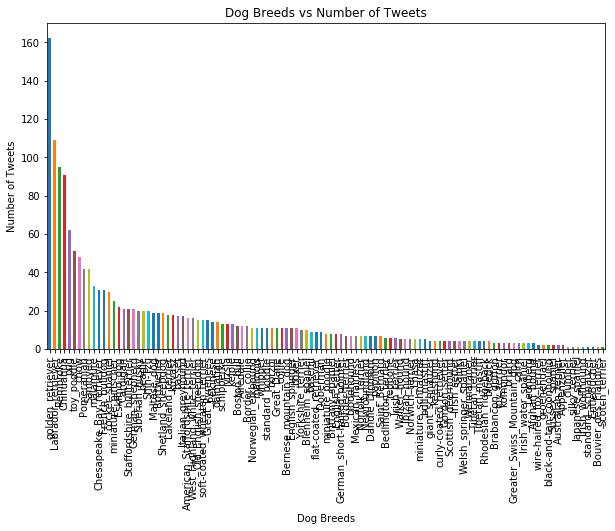

In [51]:
dog_popular_df = species_df.sort_values(['tweet_id'], ascending = False)
dog_popular_df = dog_popular_df.reset_index()
dog_popular_df.plot(x='dog_species', y='tweet_id', kind='bar', figsize=(10,6), legend=None);
plt.ylabel('Number of Tweets')
plt.xlabel('Dog Breeds')
plt.title('Dog Breeds vs Number of Tweets');

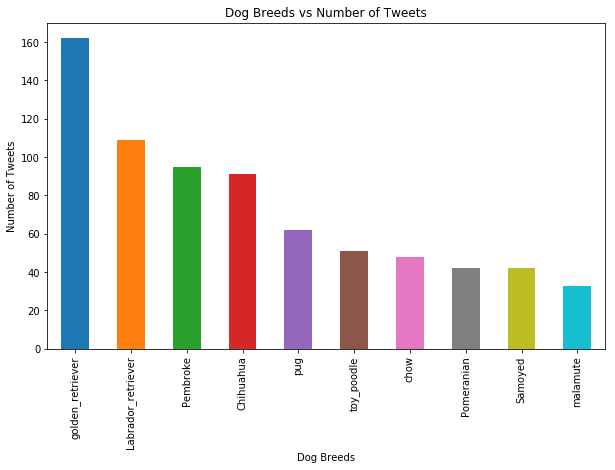

In [52]:
dog_popular_df = species_df.sort_values(['tweet_id'], ascending = False).head(10)
dog_popular_df = dog_popular_df.reset_index()
dog_popular_df.plot(x='dog_species', y='tweet_id', kind='bar', figsize=(10,6), legend=None);
plt.ylabel('Number of Tweets')
plt.xlabel('Dog Breeds')
plt.title('Dog Breeds vs Number of Tweets');

In [55]:
species_df.sort_values(['tweet_id'], ascending = False).head(10).reset_index().dog_species.values

array(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Pomeranian', 'Samoyed', 'malamute'], dtype=object)

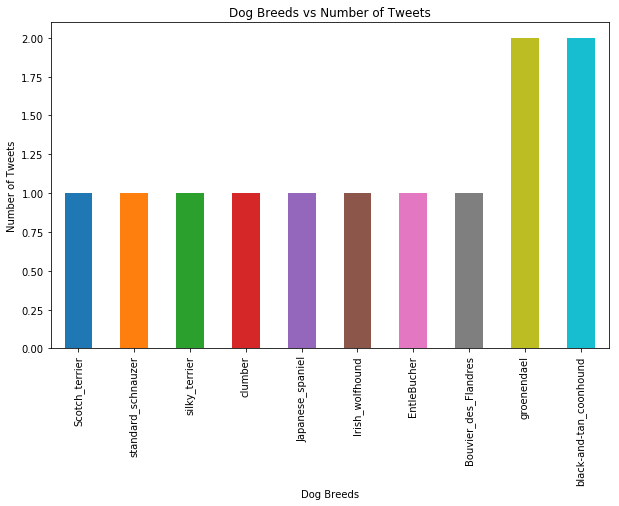

In [53]:
dog_popular_df = species_df.sort_values(['tweet_id'], ascending = True).head(10)
dog_popular_df = dog_popular_df.reset_index()
dog_popular_df.plot(x='dog_species', y='tweet_id', kind='bar', figsize=(10,6), legend=None);
plt.ylabel('Number of Tweets')
plt.xlabel('Dog Breeds')
plt.title('Dog Breeds vs Number of Tweets');

In [56]:
species_df.sort_values(['tweet_id'], ascending = True).head(10).reset_index().dog_species.values

array(['Scotch_terrier', 'standard_schnauzer', 'silky_terrier', 'clumber',
       'Japanese_spaniel', 'Irish_wolfhound', 'EntleBucher',
       'Bouvier_des_Flandres', 'groenendael', 'black-and-tan_coonhound'], dtype=object)

Insights
* The most common species from WeRateDogs are 'golden_retriever', 'Labrador_retriever', 'Pembroke', 'Pomeranian',
       'pug'.
       
* The list common species from WeRateDogs are 'Airedale', 'Mexican_hairless', 'Newfoundland', 'Norwich_terrier',
       'Pekinese'.
       
* The dog that received the highest favorite counts and retweet counts is a Labrador_retriever with retweet count of 80096 and favourite count of 160194.